In [1]:
%matplotlib inline
from sympy import  *
init_printing(pretty_print = True)

### Part A

We do the same process as in 6.7.2 but instead we factor $\frac{1}{r}$ out of the integrand instead of $\frac{1}{R}$ and we let x = $\frac{r}{R}$, and we integrate from 0 to $2\pi$

In [2]:

# define symbols that are going to be used
# in symbolic computations for real, integer, 
# and function objects
x, r, R, theta, mu, G, M, g = symbols('x r R theta mu G M g')
n = symbols('n', integer=True)
f, genfun, phi = symbols('f genfun phi', cls=Function)

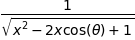

In [3]:
 #define the integrand that here represents
# the so-called generating function of
# the Legendre polynomials
genfun = 1/sqrt(1+x**2-2*x*cos(theta))
genfun


In [4]:

# expand it into a series in x=(R/r) < 1 up to its 3rd power
genfun.series(x,0,5)

In [5]:
# get rid of the O symbol for the following computations
getfunc_trunc = (genfun.series(x,0,5)).removeO()
getfunc_trunc

In [6]:

# collect all the coefficients in the above expansion
coeff = [getfunc_trunc.coeff(x,i).factor() for i in range(5)]
coeff


In [7]:

# integrate the truncated series expansion of
# the generating function in theta from 0 to pi
integral = integrate(getfunc_trunc, (theta,0,2*pi))
integral

In [8]:

# substitute the integral in the expression for 
# the gravitatonal potential
phi = -1*x*mu*G*integral
phi

In [9]:
# substitute mu expressed via M, R, and r in phi
f = phi.subs({mu:M/(2*pi*r)})
print ("The gravitational potential of the ring is")
f

The gravitational potential of the ring is


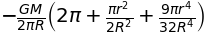

In [13]:
f =f.subs(x,r/R)
f

 and this is $-\frac{GM}{R}\left(1 + \frac{r^2}{4R^2}\right)$ , as needed

### Part B

In [56]:
rval = 1.496e11
Rval = 7.784e11
Mval = 1.90e27
Gval = 6.674e-11
xval = rval/Rval

# substitute mu expressed via M, R, and r in phi
f = phi.subs({mu:M/(2*pi*r)})
f =f.subs(x,r/R)

#sub in values
f = lambdify(r, f)
f = f(rval)
f = lambdify(R, f)
f = f(Rval)
f = lambdify(G, f)
f = f(Gval)
f = lambdify(M, f)
f = f(Mval)
print("The average gravitational potential that jupiter exerts on the earth is %3.0f J" %f)

The average gravitational potential that jupiter exerts on the earth is -164442 J


## Part C

In [31]:
import numpy as np
from math import sqrt #directly import for efficiency
from math import pow

In [47]:
import numpy as np

#set initial values
rval = 1.496e11
Rval = 7.784e11
Mval = 1.90e27
Gval = 6.674e-11

f = -164441
pie = 3.14159#so we don't have to call math.pi in the loop


#returns potential approximated for n masses in jupiter's orbit
def get_pot (n,rval):
    nrng = np.arange(0,n)
    m = Mval/2/n
    #print(m)
    #use only one list comprehension for efficiency
    pot = sum(-2*Gval*m/(sqrt(Rval**2+rval**2-2*Rval*rval*np.cos(pie - pie/n*x))) for x in nrng) 
    return pot


#returns potential approximated up to 1/10^4 precision
def approx_pot(rval):
    f1 = get_pot(1,rval)
    f2 = get_pot(2,rval)
    n = 3
    while f1-f2 >  0.001:
        f1 = f2
        f2 = get_pot(n,rval)
        #print(f2)
        n += 1
    
    return [f2,n]

pot0 = approx_pot(rval)
fa = pot0[0]

def percent_diff(fa):
    return abs((f-fa)/np.mean([f,fa]))*100

pdiff0 = percent_diff(fa)
print("The approximated potential is %1.4f J, %1.6f%% different than the above calculated value \nand it took %d mass bodies to arrive at 1 part in 10^4 accuracy." %(pot0[0],pdiff0, pot0[1]))

The approximated potential is -164440.5614 J, 0.000267% different than the above calculated value 
and it took 18032 mass bodies to arrive at 1 part in 10^4 accuracy.


### Part D

In [17]:
import matplotlib.pyplot as plt

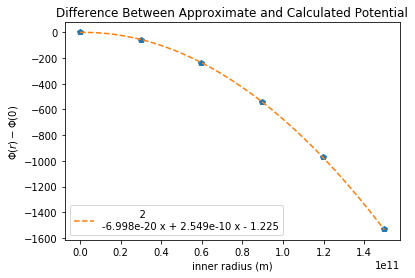

In [48]:
r_arr = np.array([0,0.2,0.4,0.6,0.8,1])*rval
pots = [approx_pot(x) for x in r_arr] 
f0 = pots[0][0] #define Phi(0)
diff = [x[0]-f0 for x in pots]
plt.plot(r_arr,diff, "p")

#fit a quadratic polynomial to show quadratic nature of di
z = np.polyfit(r_arr,diff,2)
p = np.poly1d(z)
xp = np.linspace(0,1.5e11,1000)
plt.plot(xp, p(xp), "--", label=p)
plt.title("Difference Between Approximate and Calculated Potential")
plt.xlabel("inner radius (m)")
plt.ylabel("$\Phi(r) - \Phi(0)$")
plt.legend()